In [1]:
import pandas as pd


In [2]:
credit_df = pd.read_csv('creditcard_dataset.csv')
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Metric selection on imbalance data¶
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

* When the data is imbalanced or less, it is better to use K-Fold Cross Validation for evaluating the performance when the data set is randomly split into ‘k’ groups.
* Stratified K-Fold Cross Validation is an extension of K-Fold cross-validation, in which you rearrange the data to ensure that each fold is a good representative of all the strata of the data.
* When you have a small data set, the computation time will be manageable to test out different hyperparameter combinations. In this scenario, it is advised to use a grid search.
* However, with large data sets, it is advised to use a randomised search because the sampling will be random and not uniform.

In [3]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

y= credit_df["Class"]
X = credit_df.drop("Class", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)


pt= PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
ROC-AUC Score for val data = 0.9798407459977198
Mean precision val score: 0.885478588591554
Mean recall val score: 0.6295975017349064
Mean f1 val score: 0.7341406860856002
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
ROC-AUC Score for val data = 0.9791192140030399
Mean precision val score: 0.8864850427350427
Mean recall val score: 0.6371925360474978
Mean f1 val sco

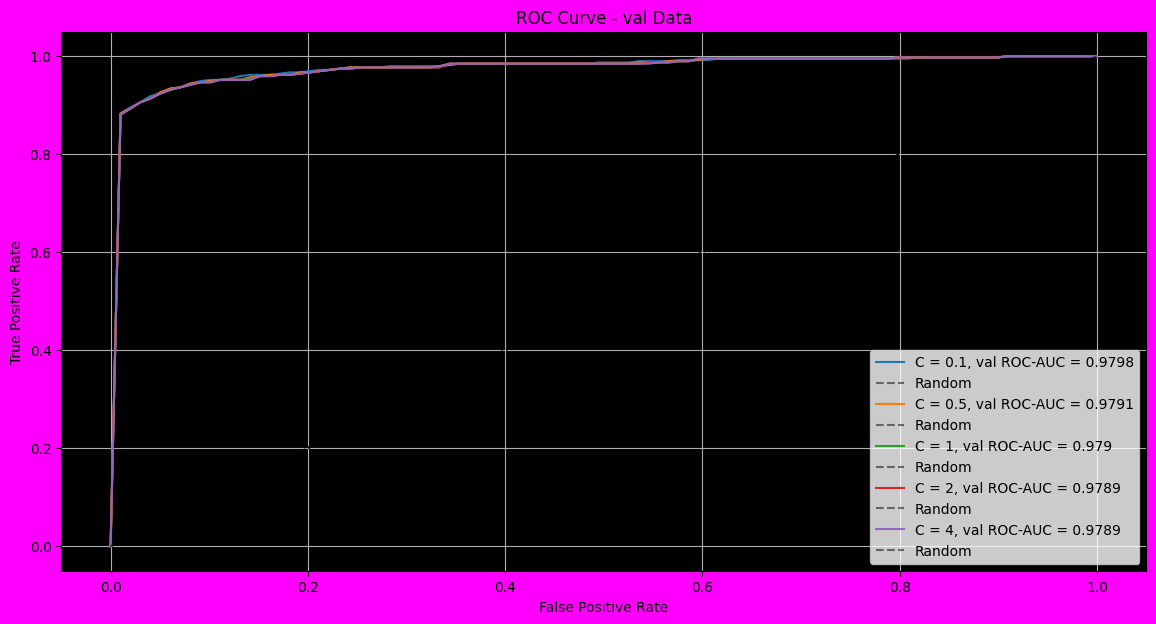

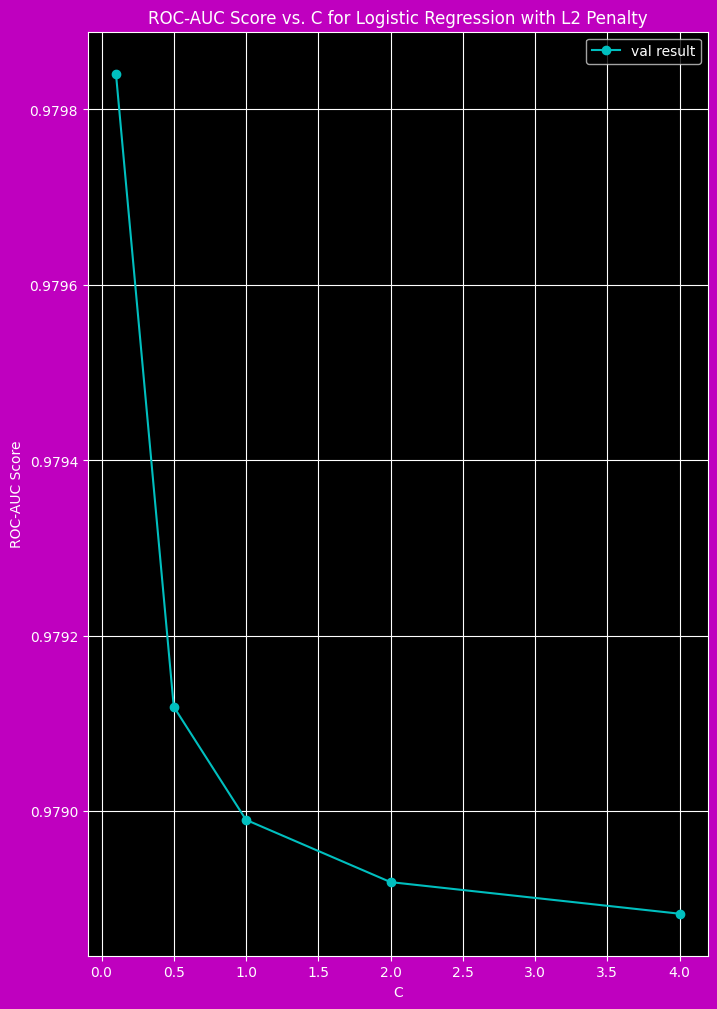

Mean ROC-AUC scores for val data for all values of C: 
 [0.9798407459977198, 0.9791192140030399, 0.9789903196878932, 0.9789193499112935, 0.9788833254970882]
Best C: 0.1
Best Mean ROC-AUC score for val data: 0.9798407459977198
Mean precision val score for best C 0.885478588591554
Mean recall val score for best C 0.6295975017349064
Mean f1 val score for best C 0.7341406860856002


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation    
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)
        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))

        # precision_val.append(precision_score(y_val_cv, y_val_pred))
        
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        
        # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


    # Plot ROC curve for random classifier
    ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()


# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])